# **1. 단항 선형 회귀**

* 한개의 입력이 들어가서 한개의 출력이 나오는 구조

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

In [2]:
torch.manual_seed(2024)

In [3]:
X_train = torch.FloatTensor([[1], [2], [3]])
y_train = torch.FloatTensor([[2], [4], [6]])

print(X_train, X_train.shape)
print(y_train, y_train.shape)

tensor([[1.],
        [2.],
        [3.]]) torch.Size([3, 1])
tensor([[2.],
        [4.],
        [6.]]) torch.Size([3, 1])


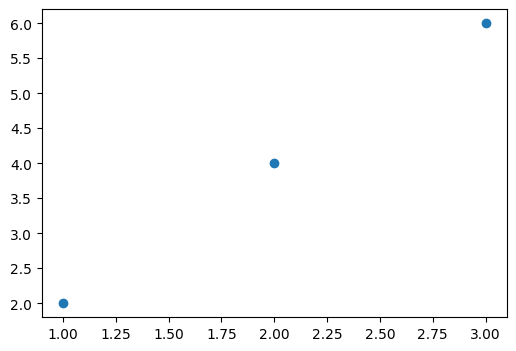

In [4]:
plt.figure(figsize = (6, 4))

plt.scatter(x = X_train, y = y_train)

In [5]:
# y = Wx + b

model = nn.Linear(1, 1)

model

Linear(in_features=1, out_features=1, bias=True)

In [6]:
y_pred = model(X_train)

y_pred

tensor([[0.7260],
        [0.7894],
        [0.8528]], grad_fn=<AddmmBackward0>)

In [7]:
list(model.parameters()) # w : 0.0634 b : 0.6625

# y = wx + b
# x = 1, 0.0634 * 1 + 0.6625 = 0.7260

[Parameter containing:
 tensor([[0.0634]], requires_grad=True),
 Parameter containing:
 tensor([0.6625], requires_grad=True)]

In [8]:
((y_pred - y_train) ** 2).mean()

tensor(12.8082, grad_fn=<MeanBackward0>)

In [9]:
loss = nn.MSELoss()(y_pred, y_train)

loss

tensor(12.8082, grad_fn=<MseLossBackward0>)

# **2. 최적화(Optimization)**

* 학습 모델의 손실 함수(loss function)의 최소값을 찾아가는 과정
* 학습 데이터를 입력해서 파라미터를 걸쳐 예측 값을 받음 -> 예측값과 실제 정답과 차이를 비교하는 것이 손실 함수 이고 예측값과 실젯 값 차이를 최소화 하는 파라미터를 찾는 과정이 최적화


### 2-1. 경사 하강법(Gradient Descent)

* 딥러닝 알고리즘 학습 시 사용되는 최적화 방법 중 하나
* 최적화 알고리즘을 통해 최적의 w와 b를 찾아내는 과정을 '학습' 이라고 함

 <center><img src='https://i.imgur.com/0fW4LTG.png' width=600></center>



### 2-2  학습률(learning rate)

* 한번의 w를 움직이는 거리(increment step)
* 0 ~ 1 사이의 실수
* 학습률이 너무 크면 한 지점으로 수렴하는 것이 아니라 발산할 가능성이 존재
* 너무 작은 학습률을 택할 때에는 수렴이 늦어지고 시작점을 어디로 잡느냐에 따라 수렴 지점이 달라짐

<center><img width=800 src='https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FedThAP%2FbtrYAnoERmh%2FDXVtwO2M7GkM4l5dRcFxr0%2Fimg.png'></center>

<center><img width=800 src='https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FbxxkZk%2FbtrYzEEt8bd%2FUL9zBuxrdTaIBUtYS5kPI0%2Fimg.png'></center>

### 2-3. 경사 하강법의 한계

* 많은 연산량과 컴퓨터 자원을 소모
* 데이터(입력값) 하나가 모델을 지날 때마다 모든 가중치를 한 번씩 업데이트 함
* 가중치가 적은 모델의 경우 문제가 없으나 모델의 가중치가 매우 많다면 모든 가중치에 대해 연산을 적용하기 때문에 많은 연산량을 요구
* Global Minimum은 목표 함수 그래프 전체를 고려했을때 최솟값을 의미하고 Local Minimum은 그래프 내 일부만 고려했을 때 최솟값을 의미 -> 경사 하강법으로 최적의 값인 줄 알았던 값이 Local Minimum 으로 결과가 나올 수 있

In [10]:
# SGD(Stochastic Gradient Descent)
# 랜덤하게 데이터를 하나씩 뽑아서 loss를 만듬
# 데이터를 넣고 다시 데이터를 뽑고를 반복
# 빠르게 방향을 결정

optimizer = optim.SGD(model.parameters(), lr = 0.01)


In [11]:
loss = nn.MSELoss()(y_pred, y_train)

In [12]:
# optimizer를 초기화
# loss.backward() 호출 될 때 초기 설정은 gradient를 더해주는 것으로 되어 있음
# 학습 loop를 돌때 이상적으로 학습이 이루어지기 위해서 한번의 학습이 완료되어지면
# gradient를 항상 0으로 만들어 줘야함

optimizer.zero_grad()

# 역전파 : 비용 함수를 미분하여 gradient 계산

loss.backward()

# 가중치 업데이트 : 계산된 gradient를 사용하여 파라미터를 업데이트

optimizer.step()

In [13]:
# list(model.parameters()) # w : 0.0634 b : 0.6625

list(model.parameters()) # w : 0.2177 b : 0.7267

[Parameter containing:
 tensor([[0.2177]], requires_grad=True),
 Parameter containing:
 tensor([0.7267], requires_grad=True)]

In [14]:
# 반복 학습을 통해 오차가 있는, W b를 수정하면서 오차를 계속 줄여나감
# epochs : 반복 학습 횟수(에포크)

epochs = 1000

for epoch in range(epochs + 1) :
    y_pred = model(X_train)
    loss = nn.MSELoss()(y_pred, y_train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if epoch % 100 == 0 :
        print(f'Epoch : {epoch} / {epochs} loss : {loss : .6f}')

Epoch : 0 / 1000 loss :  10.171454
Epoch : 100 / 1000 loss :  0.142044
Epoch : 200 / 1000 loss :  0.087774
Epoch : 300 / 1000 loss :  0.054239
Epoch : 400 / 1000 loss :  0.033517
Epoch : 500 / 1000 loss :  0.020711
Epoch : 600 / 1000 loss :  0.012798
Epoch : 700 / 1000 loss :  0.007909
Epoch : 800 / 1000 loss :  0.004887
Epoch : 900 / 1000 loss :  0.003020
Epoch : 1000 / 1000 loss :  0.001866


In [15]:
print(list(model.parameters())) # w : 1.9955 b : 0.0102

[Parameter containing:
tensor([[1.9499]], requires_grad=True), Parameter containing:
tensor([0.1138], requires_grad=True)]


In [16]:
X_test = torch.FloatTensor([[5]])
y_pred = model(X_test)

y_pred

tensor([[9.8635]], grad_fn=<AddmmBackward0>)

# **3. 다중 선형 회귀**

* 여러개의 입력이 들어가서 한 개의 출력이 나오는 구조

In [17]:
X_train = torch.FloatTensor([[73, 80, 75],
                             [93, 88, 93],
                             [89, 91, 90],
                             [96, 98, 100],
                             [73, 66, 70]])

y_train = torch.FloatTensor([[220],
                             [270],
                             [265],
                             [290],
                             [200]])

In [18]:
X_train.shape, y_train.shape

(torch.Size([5, 3]), torch.Size([5, 1]))

In [19]:
# y = W1x1 + W2x2 + W3x3 + b

model = nn.Linear(3, 1)

model

Linear(in_features=3, out_features=1, bias=True)

In [20]:
optimizer = optim.SGD(model.parameters(), lr = 0.00001)

In [21]:
epochs = 20000

for epoch in range(epochs + 1) :
    y_pred = model(X_train)
    loss = nn.MSELoss()(y_pred, y_train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if epoch % 10000 == 0 :
        print(f'Epoch : {epoch} / {epochs} loss : {loss : .6f}')

Epoch : 0 / 20000 loss :  75967.109375
Epoch : 10000 / 20000 loss :  7.307398
Epoch : 20000 / 20000 loss :  5.335708


In [22]:
print(list(model.parameters())) # w : [0.6814, 0.8616, 1.3889] b : -0.2950

[Parameter containing:
tensor([[0.6814, 0.8616, 1.3889]], requires_grad=True), Parameter containing:
tensor([-0.2950], requires_grad=True)]


In [23]:
X_test = torch.FloatTensor([[100, 100, 100]])
y_pred = model(X_test)

y_pred

tensor([[292.8991]], grad_fn=<AddmmBackward0>)

In [24]:
import pandas as pd
import seaborn as sns

# **4. temps.csv 데이터에서 기온에 따른 지면온도를 예측하기**

In [25]:
temp_df = pd.read_csv('/content/drive/MyDrive/Korea it 아카데미/DeepLearning/data/temps.csv', encoding = 'euc-kr')

temp_df.head()

,지점,지점명,일시,기온(°C),지면온도(°C)
0,232,천안,2020-01-01 01:00,-8.7,-2.9
1,232,천안,2020-01-01 02:00,-7.3,-2.4
2,232,천안,2020-01-01 03:00,-6.7,-2.2
3,232,천안,2020-01-01 04:00,-6.2,-2.0
4,232,천안,2020-01-01 05:00,-5.9,-1.9


In [26]:
temp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8782 entries, 0 to 8781
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   지점        8782 non-null   int64  
 1   지점명       8782 non-null   object 
 2   일시        8782 non-null   object 
 3   기온(°C)    8779 non-null   float64
 4   지면온도(°C)  8782 non-null   float64
dtypes: float64(2), int64(1), object(2)
memory usage: 343.2+ KB


In [27]:
temp_df.isnull().sum()

지점          0
지점명         0
일시          0
기온(°C)      3
지면온도(°C)    0
dtype: int64

In [28]:
temp_df['기온(°C)'][temp_df['기온(°C)'].isnull() == True]

5713   NaN
5714   NaN
5720   NaN
Name: 기온(°C), dtype: float64

In [29]:
temp_df.dropna(axis = 0, inplace = True)

In [30]:
temp_df.isnull().sum()

지점          0
지점명         0
일시          0
기온(°C)      0
지면온도(°C)    0
dtype: int64

In [31]:
x_data = temp_df[['기온(°C)']]
y_data = temp_df[['지면온도(°C)']]

In [32]:
X_train = torch.FloatTensor(x_data.values)
y_train = torch.FloatTensor(y_data.values)

In [33]:
X_train

tensor([[-8.7000],
        [-7.3000],
        [-6.7000],
        ...,
        [-7.3000],
        [-9.0000],
        [-9.2000]])

In [34]:
X_train.shape, y_train.shape

(torch.Size([8779, 1]), torch.Size([8779, 1]))

In [35]:
model = nn.Linear(1, 1)

model

Linear(in_features=1, out_features=1, bias=True)

In [36]:
optimizer = optim.SGD(model.parameters(), lr = 0.001)

In [37]:
epochs = 10000

for epoch in range(epochs + 1) :
    y_pred = model(X_train)
    loss = nn.MSELoss()(y_pred, y_train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if epoch % 10000 == 0 :
        print(f'Epoch : {epoch} / {epochs} loss : {loss : .6f}')

Epoch : 0 / 10000 loss :  727.285767
Epoch : 10000 / 10000 loss :  12.956379


In [38]:
print(list(model.parameters())) # w : 1.0875 b : 0.8198

[Parameter containing:
tensor([[1.0854]], requires_grad=True), Parameter containing:
tensor([0.8198], requires_grad=True)]


In [39]:
X_test = torch.FloatTensor([[-8]])
y_pred = model(X_test)

y_pred

tensor([[-7.8633]], grad_fn=<AddmmBackward0>)

In [40]:
y_pred = model(X_train)

y_pred

tensor([[-8.6231],
        [-7.1035],
        [-6.4523],
        ...,
        [-7.1035],
        [-8.9487],
        [-9.1658]], grad_fn=<AddmmBackward0>)

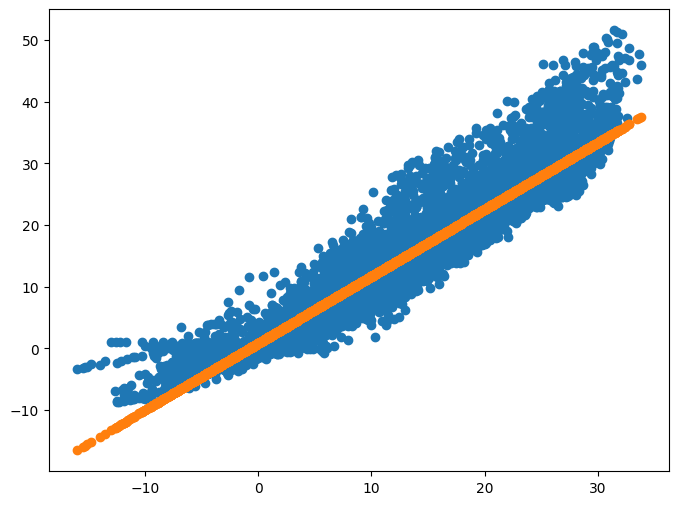

In [41]:
plt.figure(figsize = (8, 6))
plt.scatter(x_data, y_data)
plt.scatter(x_data, y_pred.detach().numpy())

In [42]:
result = model(torch.FloatTensor([[40]]))

result

tensor([[44.2353]], grad_fn=<AddmmBackward0>)